In [ ]:
from PIL import Image
import cv2
import numpy as np
import requests

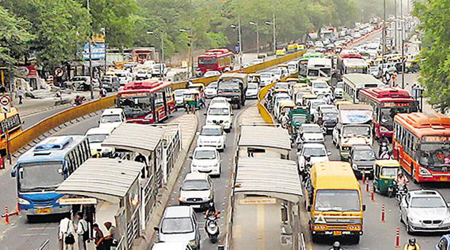

In [ ]:
image = Image.open(requests.get('https://images.hindustantimes.com/rf/image_size_630x354/HT/p2/2019/01/16/Pictures/corridor-research-institute-aggarwal-transit-corridor-corridor_b470e230-1973-11e9-b6e9-9c4bb39de67f.jpg', stream=True).raw)
image = image.resize((450,250))
image_arr = np.array(image)
image

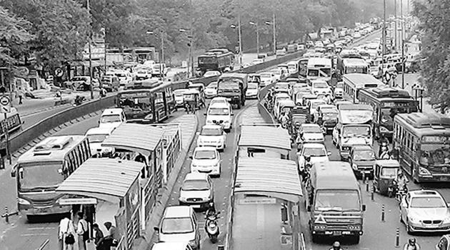

In [ ]:
grey = cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

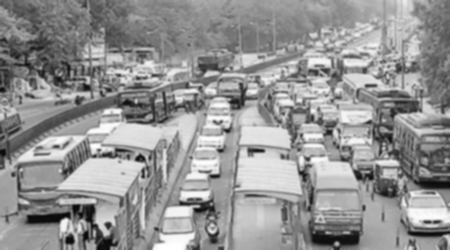

In [ ]:
blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

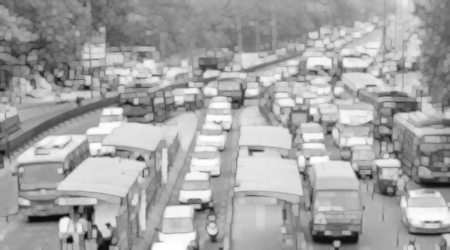

In [ ]:
dilated = cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(dilated)

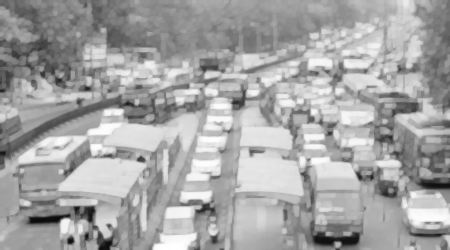

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 
Image.fromarray(closing)

In [ ]:
car_cascade_src = 'cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)
cars

array([[ 56,  22, 148, 148],
       [232,  43,  42,  42],
       [183,  35,  52,  52],
       [ 70,  72,  27,  27],
       [123, 100,  27,  27],
       [111,  75,  74,  74],
       [ 47, 131,  26,  26],
       [ 83, 132,  39,  39],
       [200, 108,  39,  39],
       [ 13, 184,  57,  57],
       [421, 219,  26,  26]], dtype=int32)

11  cars found


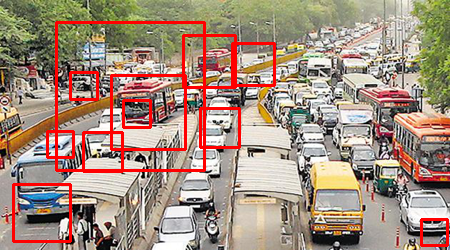

In [ ]:
cnt = 0
for (x,y,w,h) in cars:
    cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
    cnt += 1
print(cnt, " cars found")
Image.fromarray(image_arr)

In [ ]:
cascade_src = 'cars.xml'
video_src = 'Cars.mp4'

cap = cv2.VideoCapture(video_src)
car_cascade = cv2.CascadeClassifier(cascade_src)
video = cv2.VideoWriter('result.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, (450,250))  

In [ ]:
while True:
    ret, img = cap.read()
   
    if (type(img) == type(None)):
        break
        
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cars = car_cascade.detectMultiScale(gray, 1.1, 2)

    for (x,y,w,h) in cars:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)

video.write(img) 
video.release()